### 参考视频
- [Youtube--Derek Banas](https://www.youtube.com/watch?v=6GUZXDef2U0)

- [code reference -- Derek Banas](https://github.com/derekbanas/seaborn)

#### Setup

In [1]:
!pip install seaborn

Looking in indexes: http://mirrors.cloud.aliyuncs.com/pypi/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Data

In [3]:
# 查看seaborn的数据
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [5]:
# 载入其中的一个dataset
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


#### Distribution Plots


##### Distribution Plot

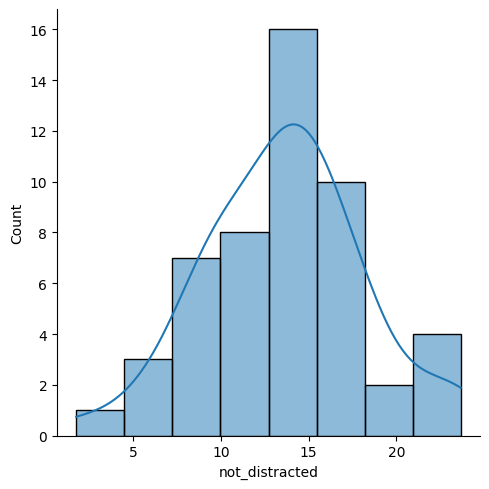

In [13]:
# kde=True表示我们希望在图上绘制核密度估计曲线。
# 可以通过参数bins来控制直方图的组数 - sns.displot(crash_df['not_distracted'], kde=True, bins=25)
sns.displot(crash_df['not_distracted'], kde=True)

##### Joint Plot

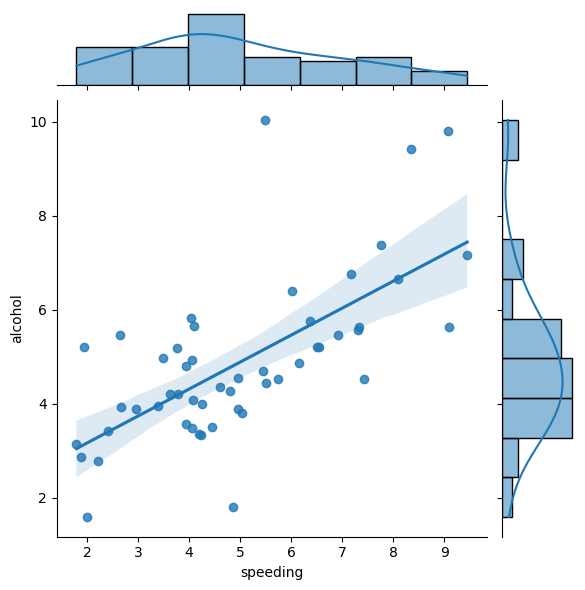

In [14]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

kde（Kernel Density Estimation，核密度估计）是一种用于估计连续型概率分布函数（PDF）的方法。在统计图形和数据科学中，它常用于展示数据点的概率密度。

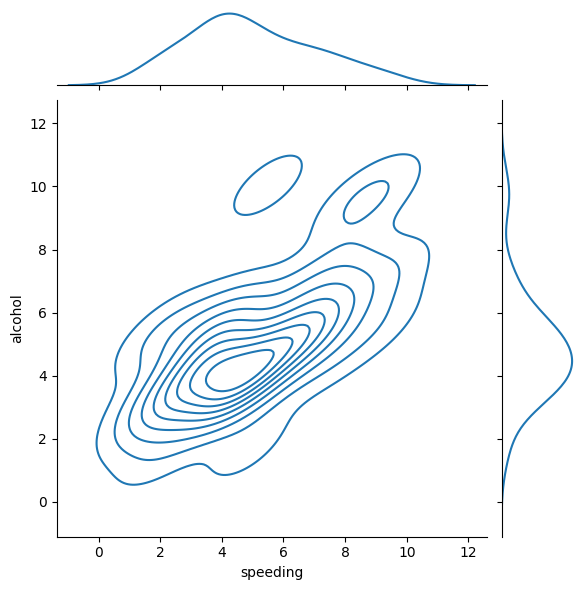

In [15]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='kde')

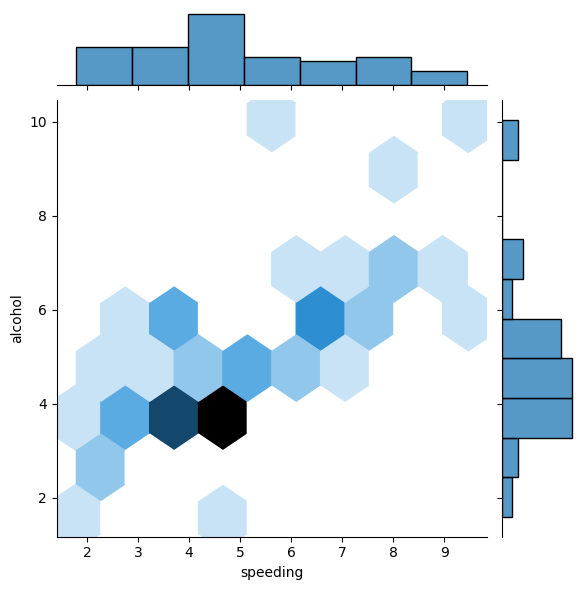

In [16]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='hex')

##### KDE Plot

<Axes: xlabel='alcohol', ylabel='Density'>

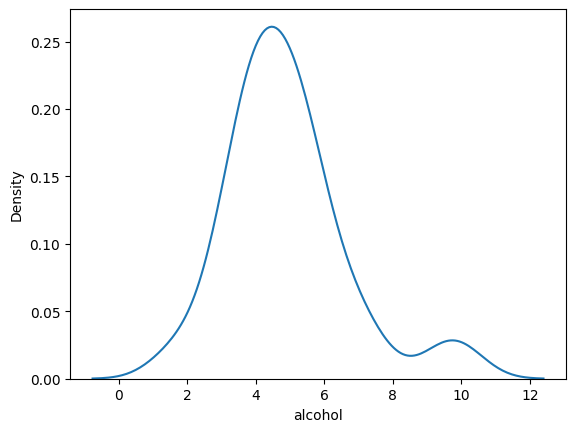

In [17]:
sns.kdeplot(crash_df['alcohol'])

##### Pair Plots

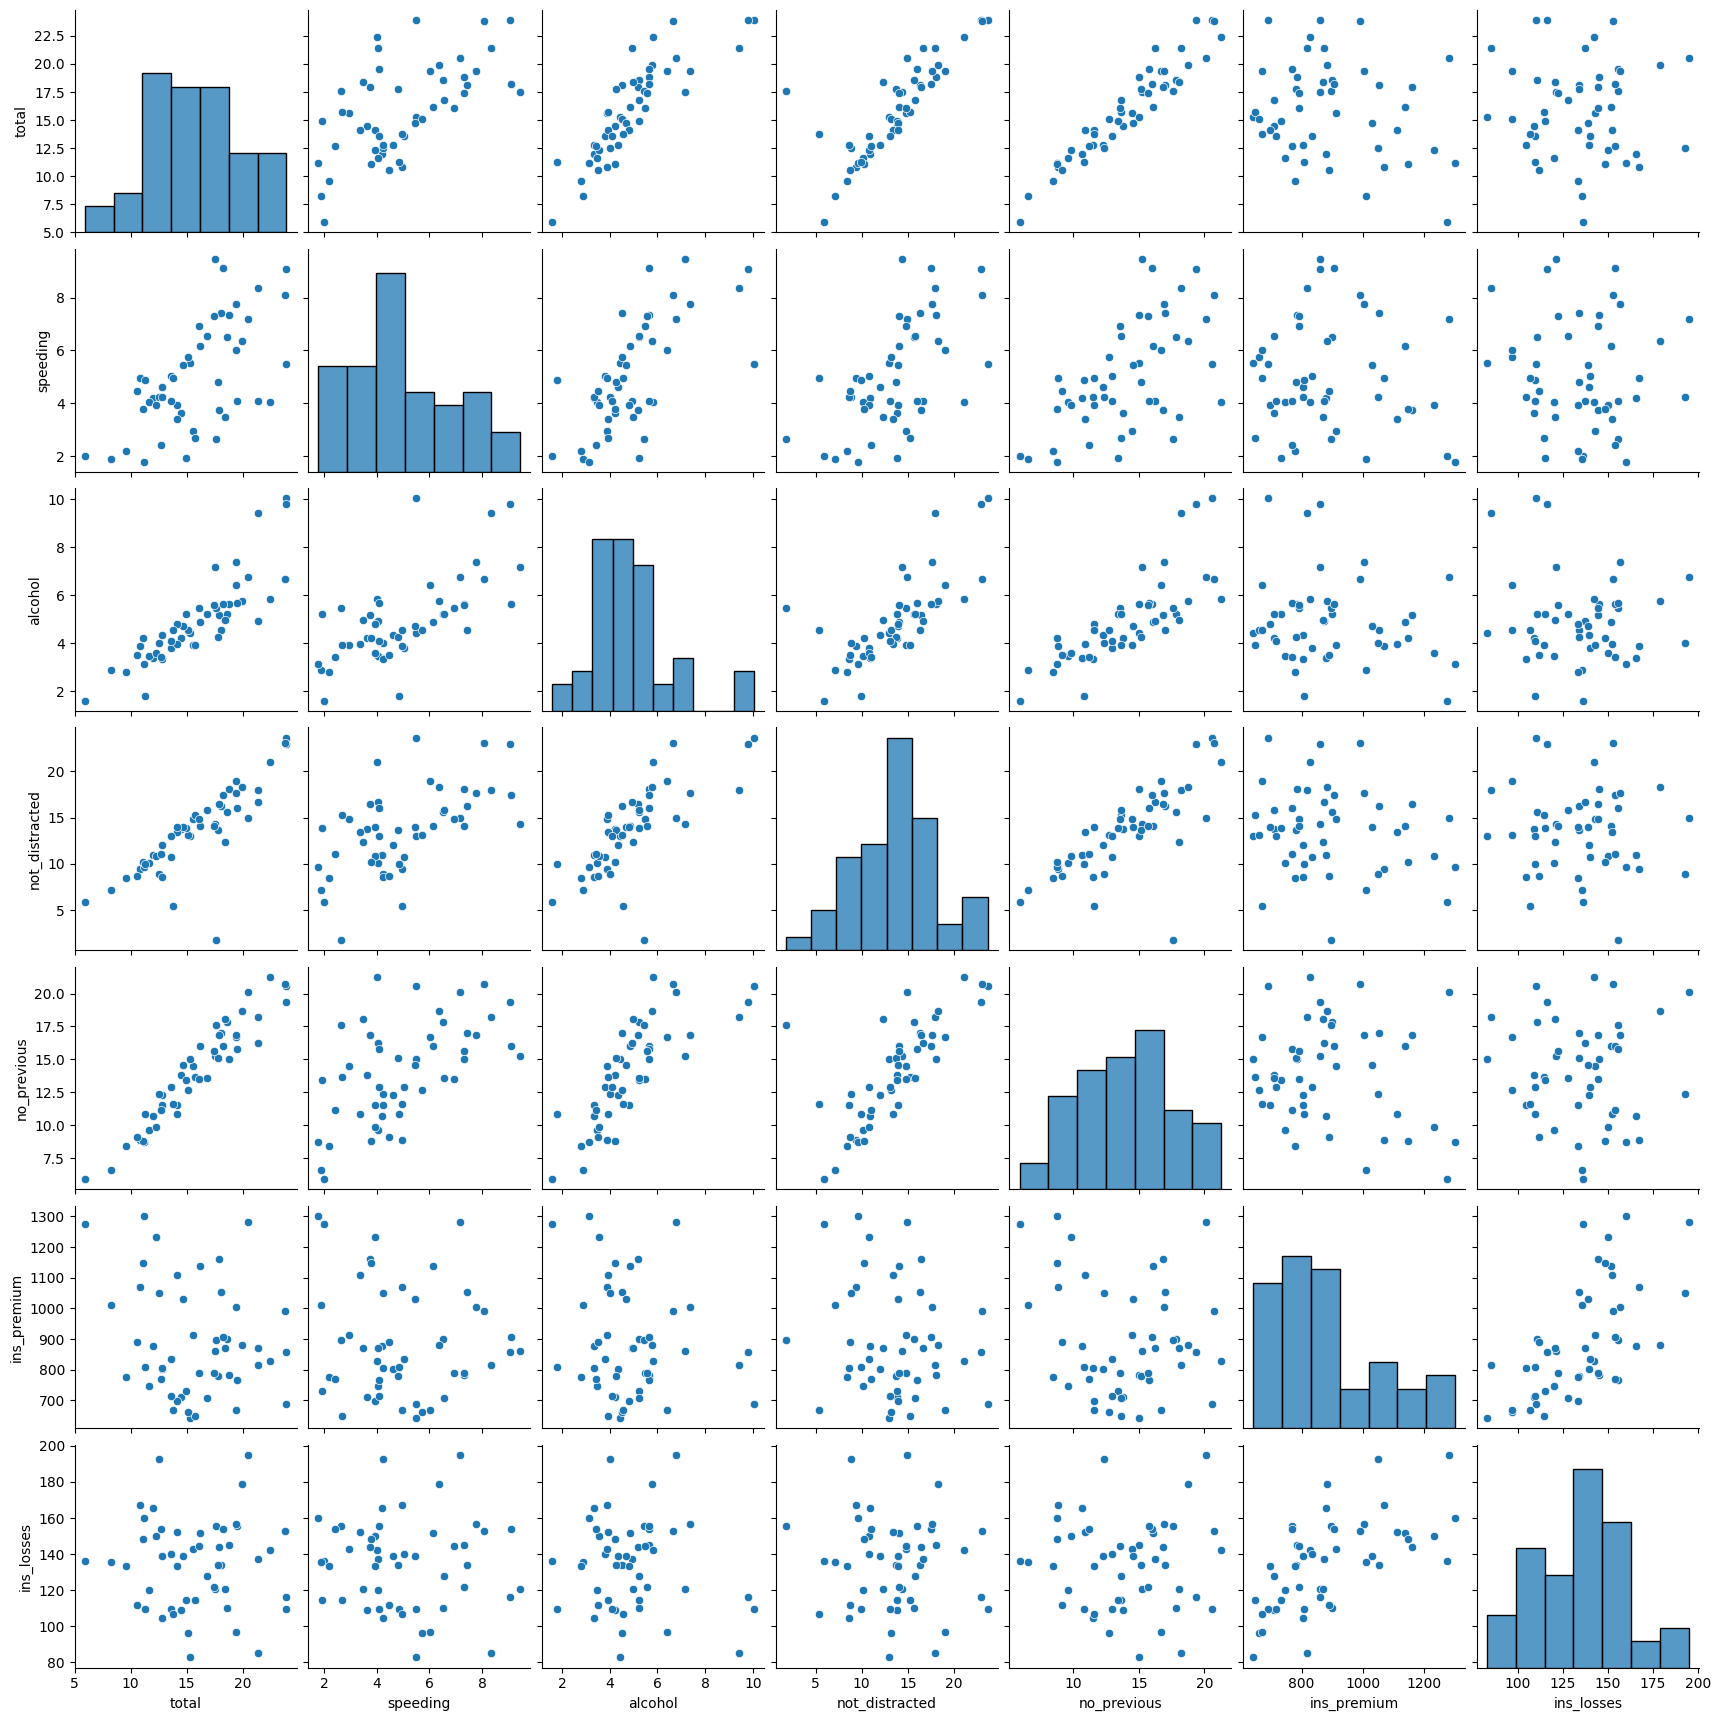

In [18]:
sns.pairplot(crash_df)

加入一个新的数据集

In [19]:
tips_df = sns.load_dataset('tips')
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


- hue：字符串，表示用于分组的数据集中的列名。在pairplot中，相同的hue值会被标记为相同的颜色。
- palette：字符串或字典，用于指定颜色映射。如果hue被指定，那么palette用于指定不同组使用的颜色。

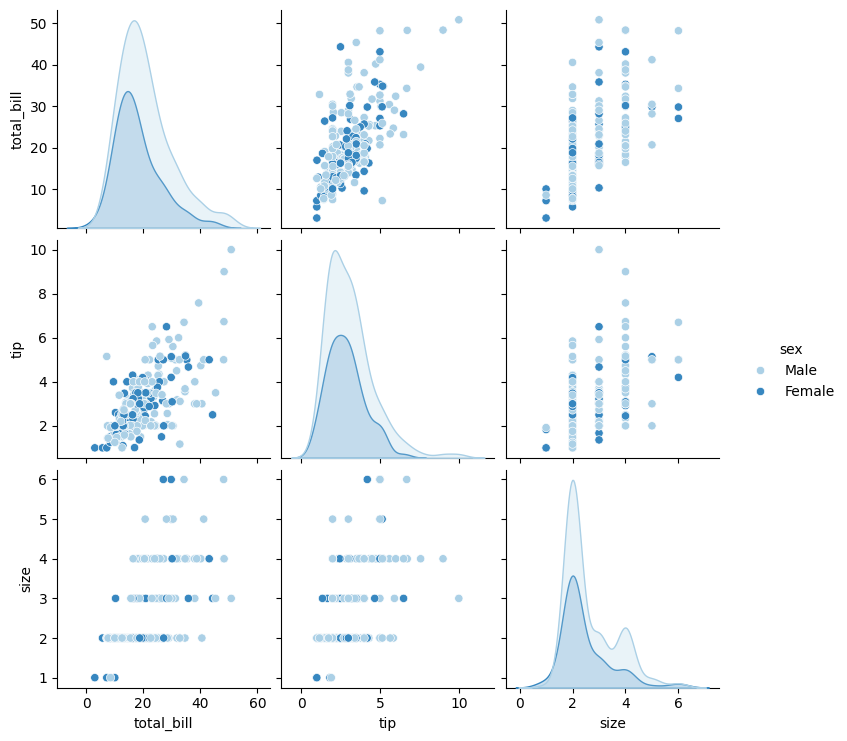

In [20]:
sns.pairplot(tips_df, hue='sex', palette='Blues')

##### Rug Plot
如果数据更常见，则颜色会更深，密度会更大

<Axes: xlabel='tip'>

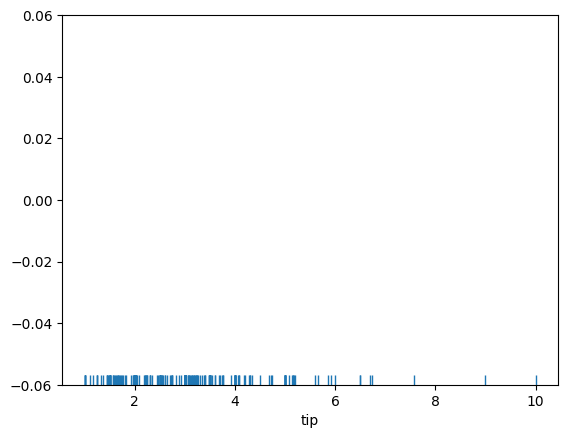

In [21]:
sns.rugplot(tips_df['tip'])

##### Styling

<Figure size 800x400 with 0 Axes>

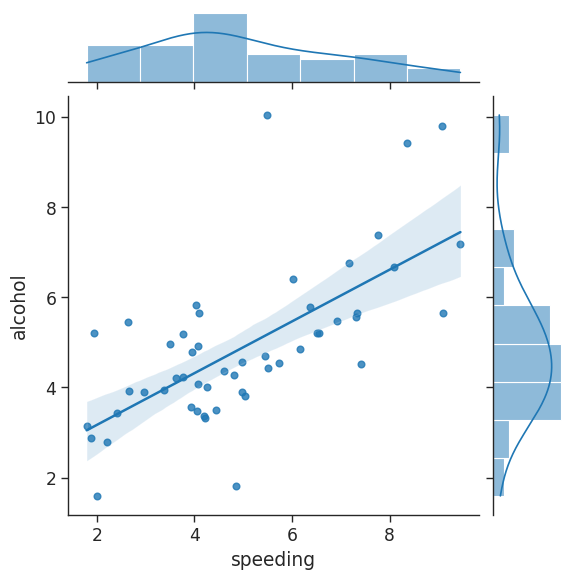

In [33]:
# sns.set_style('darkgrid')
# sns.set_style('white')
# sns.set_style('dark')
sns.set_style('ticks')
# sns.set_style('whitegrid')


plt.figure(figsize=(8,4)) # 调整图片大小

sns.set_context('paper', font_scale=1.4) # 调整字体大小
# sns.set_context('poster', font_scale=1.4) # used in poster
# sns.set_context('talk', font_scale=1.4) # used in presentation


sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

# sns.despine(left=True, bottom=True)

#### Categorical Plots

##### Bar Plots

estimator是一个参数，用于指定在分组数据上计算的统计量
- np.mean ：平均数
- np.median : 中位数
- np.std : 标准差
- np.var : 方差
- 也可以构建自己的函数
...


<Axes: xlabel='sex', ylabel='total_bill'>

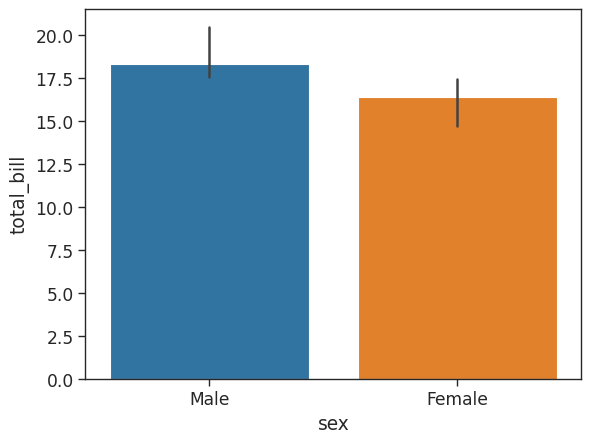

In [47]:
sns.barplot(x='sex', y='total_bill',hue='sex' ,data=tips_df, estimator=np.median)

##### Count Plot

- estimator参数的函数就是普通的计数

<Axes: xlabel='sex', ylabel='count'>

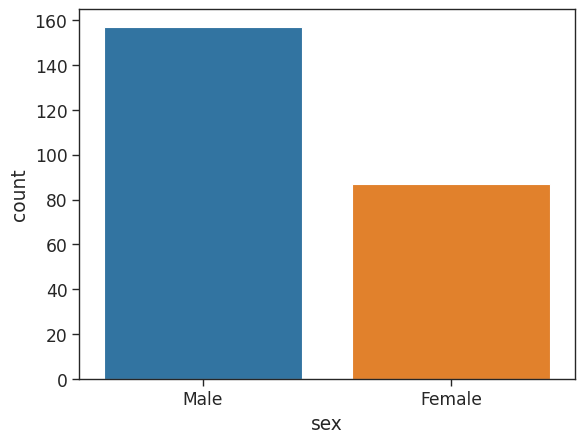

In [46]:
sns.countplot(x='sex', hue='sex',data=tips_df)

##### Box Plot
- 显示数据的四分位数

<Axes: xlabel='day', ylabel='total_bill'>

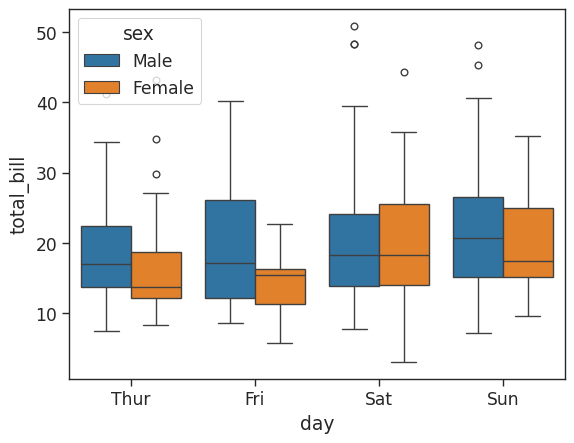

In [45]:
sns.boxplot(x='day',y='total_bill', data=tips_df, hue='sex')

##### Violin Plot
- 箱线图和kde的结合体
- split=True, 用于比较更方便比较不同横坐标间的数据

<Axes: xlabel='day', ylabel='total_bill'>

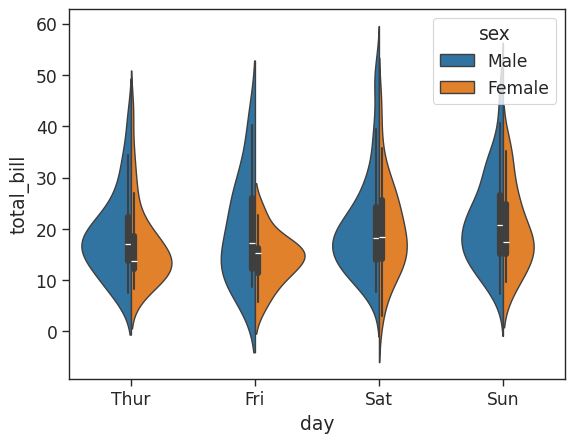

In [50]:
# sns.violinplot(x='day',y='total_bill', data=tips_df, hue='sex')
sns.violinplot(x='day',y='total_bill', data=tips_df, hue='sex',split=True)

##### Strip Plots

- jitter参数：在绘制图形时对数据点进行抖动，以避免重叠。这在数据点非常密集的情况下非常有用，可以提高图形的可读性。当jitter=True时，Seaborn会自动为每个数据点添加一些随机的偏移量，以减少重叠。
- dodge参数：可以把男女的数据点分开

<Axes: xlabel='day', ylabel='total_bill'>

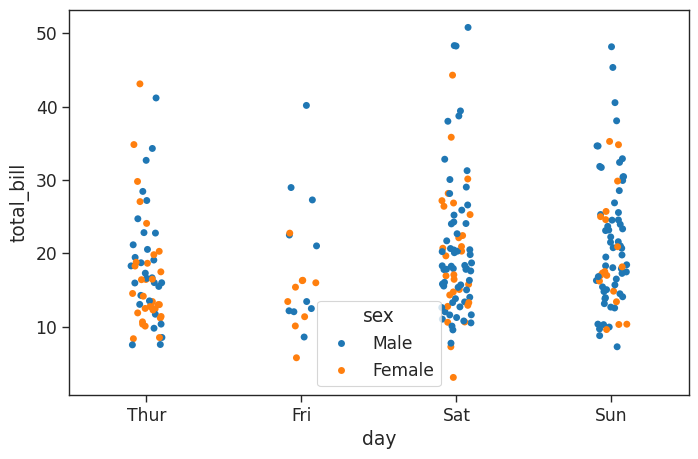

In [57]:
plt.figure(figsize=(8,5))
# sns.stripplot(x='day', y='total_bill',hue='day',data=tips_df)
sns.stripplot(x='day', y='total_bill', hue='sex',data=tips_df, jitter=True)
# sns.stripplot(x='day', y='total_bill', hue='sex',data=tips_df, jitter=True, dodge=True)



##### Swarm Plot

<Axes: xlabel='day', ylabel='total_bill'>

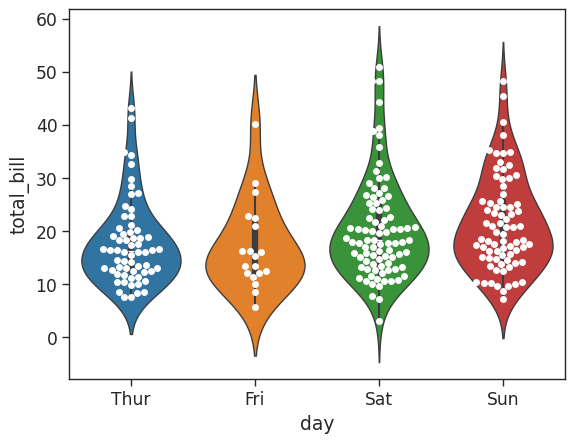

In [59]:
sns.violinplot(x='day', y='total_bill', hue='day', data=tips_df)
sns.swarmplot(x='day', y='total_bill', data=tips_df, color='white')

##### Palettes
- 更多的配色选择：
    - https://matplotlib.org/stable/users/explain/colors/colormaps.html
- 调整legend的位置：
    - upper right: 1, upper left: 2, lower_left: 3, lower_right: 4,
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

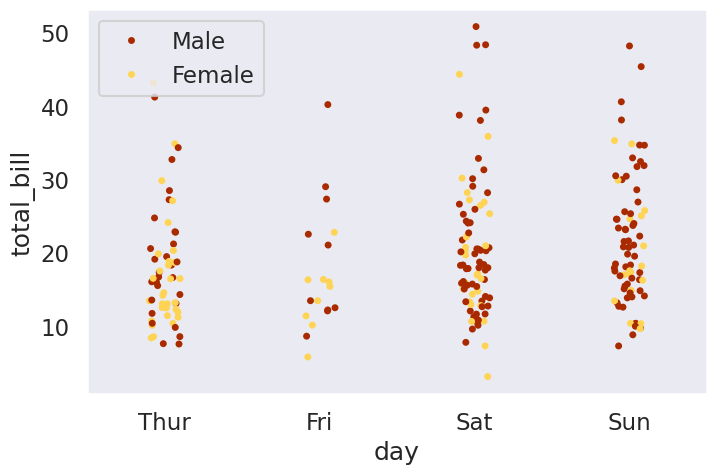

In [63]:
plt.figure(figsize=(8,5))
sns.set_style('dark')
sns.set_context('talk')
# sns.stripplot(x='day', y='total_bill', hue='sex', data=tips_df, palette='magma')
sns.stripplot(x='day', y='total_bill', hue='sex', data=tips_df, palette='afmhot')
plt.legend(loc=0)

#### Matrix Plots

##### Heatmaps

- annot参数： 将数字显示到对应的网格中

<Axes: >

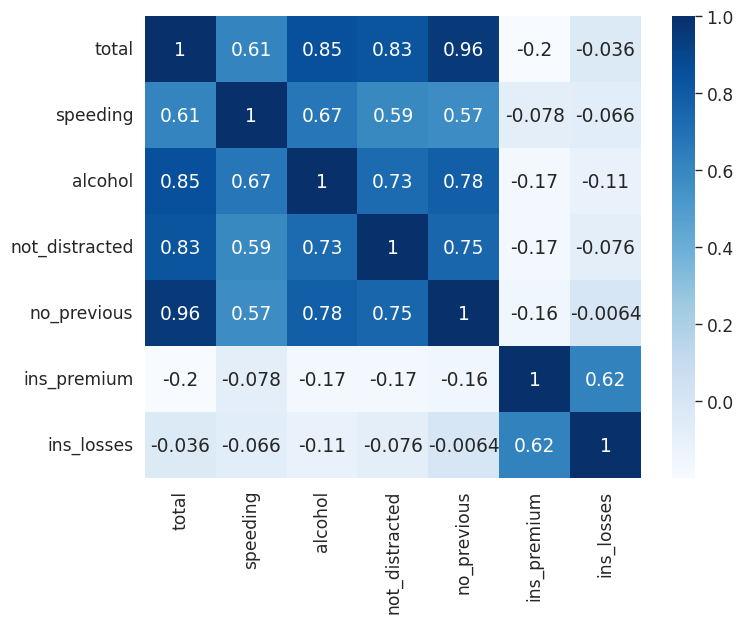

In [68]:

sns.set_context('paper', font_scale=1.4)


plt.figure(figsize=(8,6))
sns.heatmap(crash_df.corr(numeric_only=True), annot=True, cmap='Blues')

使用数据透视表

In [72]:
flights = sns.load_dataset('flights')
flights = flights.pivot_table(index='month', columns='year',values='passengers')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

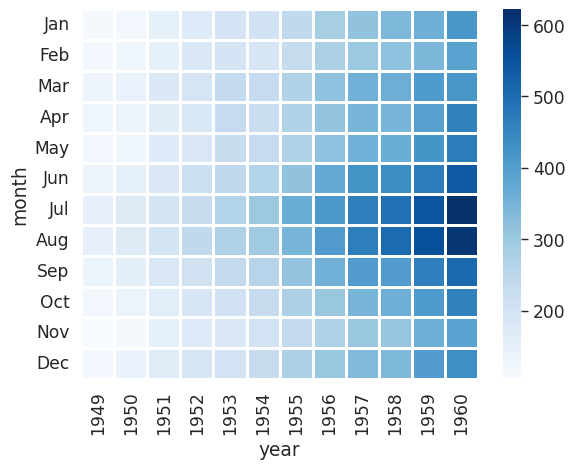

In [74]:
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidths=1)

#### Cluster Map

In [76]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


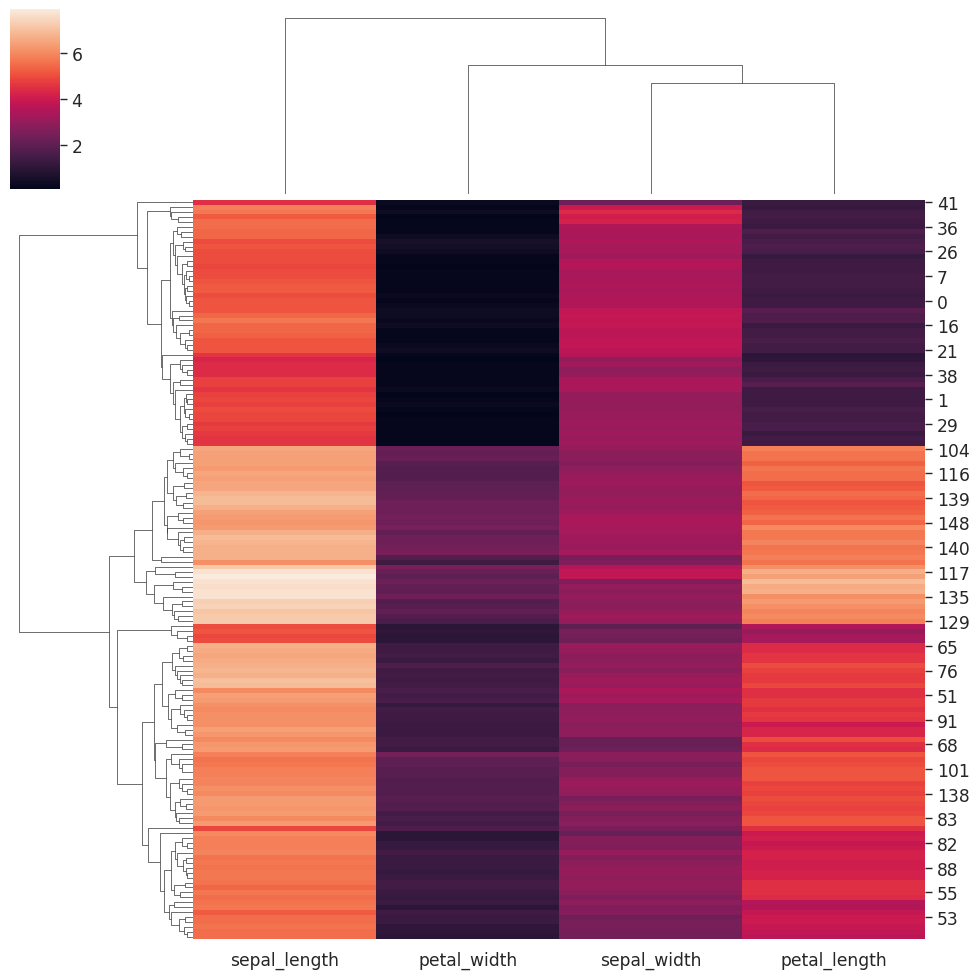

In [77]:
species = iris.pop('species')
sns.clustermap(iris)

行和列两侧的树状图（树状结构）表示对月份和年份进行了聚类，显示了它们之间的相似性。相似的数据月份或年份被归为同一个簇，显示在热图的相邻位置。

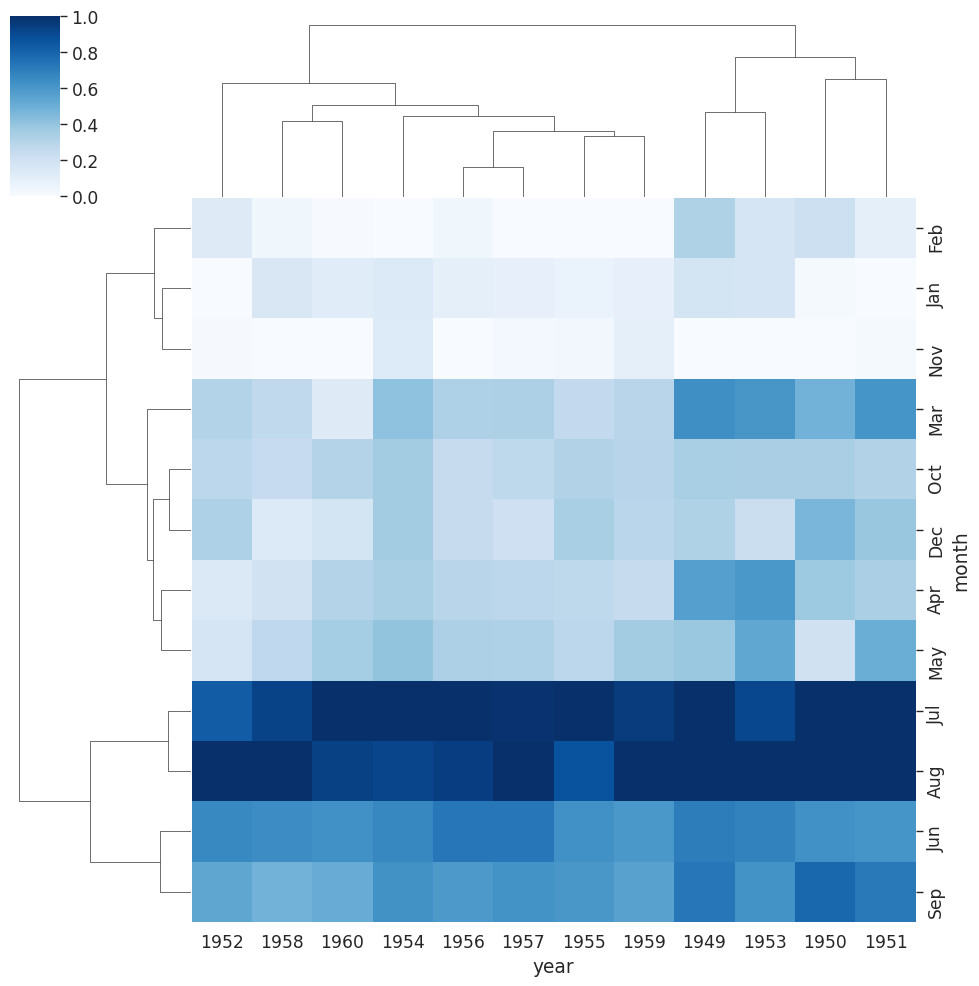

In [78]:
# standard_scale 是进行了数据的标准化
sns.clustermap(flights, cmap='Blues', standard_scale=1)

##### PairGrid

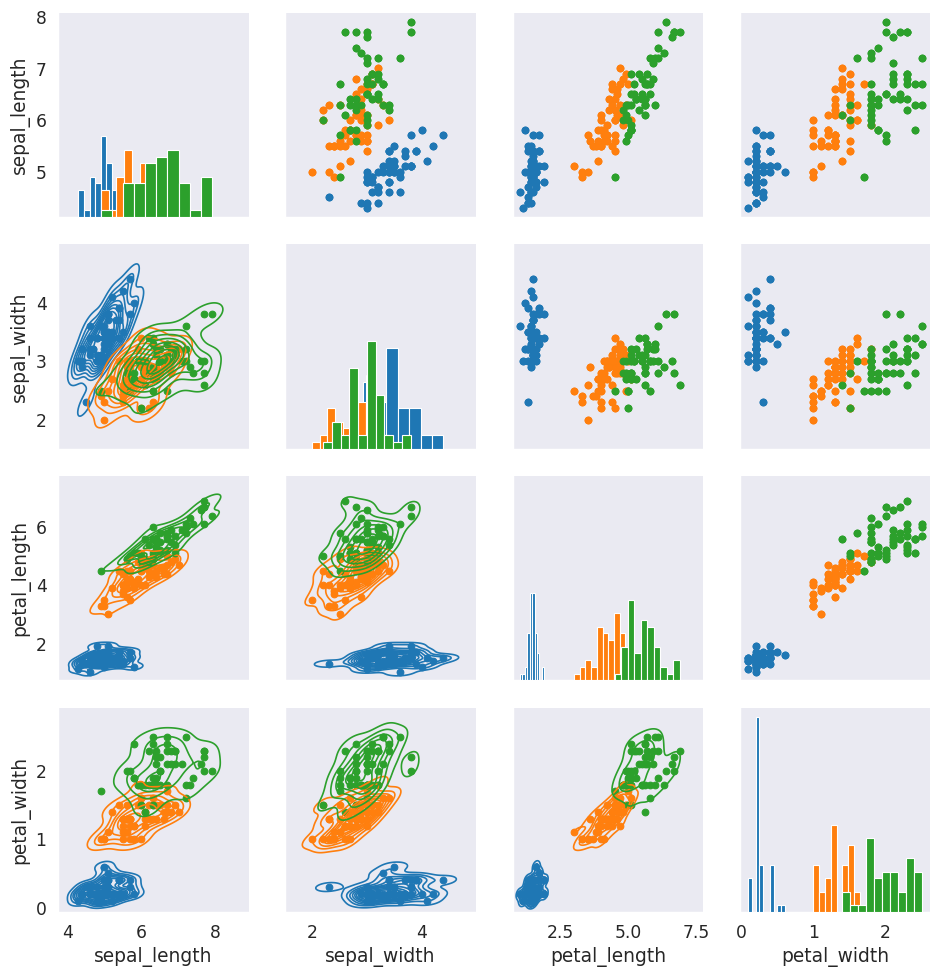

In [82]:
iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue='species')
# iris_g.map(plt.scatter)
iris_g.map_diag(plt.hist)
iris_g.map_offdiag(plt.scatter)
iris_g.map_upper(plt.scatter)
iris_g.map_lower(sns.kdeplot)



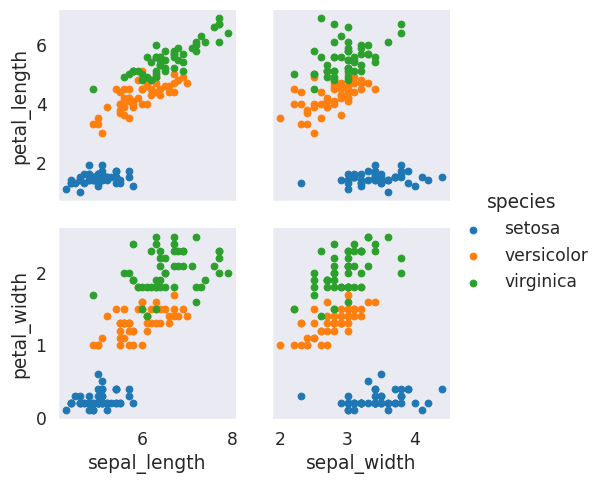

In [89]:
iris_g = sns.PairGrid(iris, hue='species',
                      x_vars=['sepal_length','sepal_width'],
                      y_vars=['petal_length','petal_width'])
iris_g.map(plt.scatter)
iris_g.add_legend()

##### Facet Grid

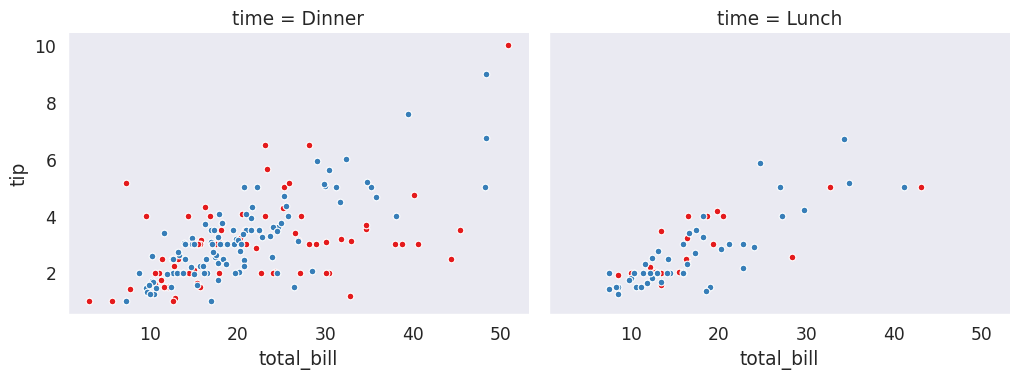

In [92]:
# tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker', height=4, aspect=1.3)
# tips_fg.map(plt.hist, 'total_bill', bins=8)
tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3, col_order=['Dinner', 'Lunch'], palette='Set1')
tips_fg.map(plt.scatter, 'total_bill', 'tip', edgecolor='w')

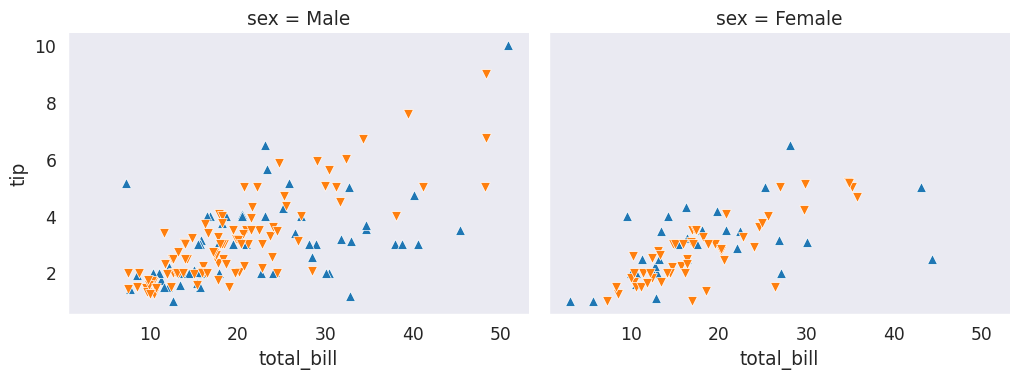

In [94]:
kws = dict(s=50, linewidth=.5, edgecolor='w')
tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3, hue_order=['Yes','No'], hue_kws=dict(marker=['^','v']))
tips_fg.map(plt.scatter, 'total_bill', 'tip', **kws)

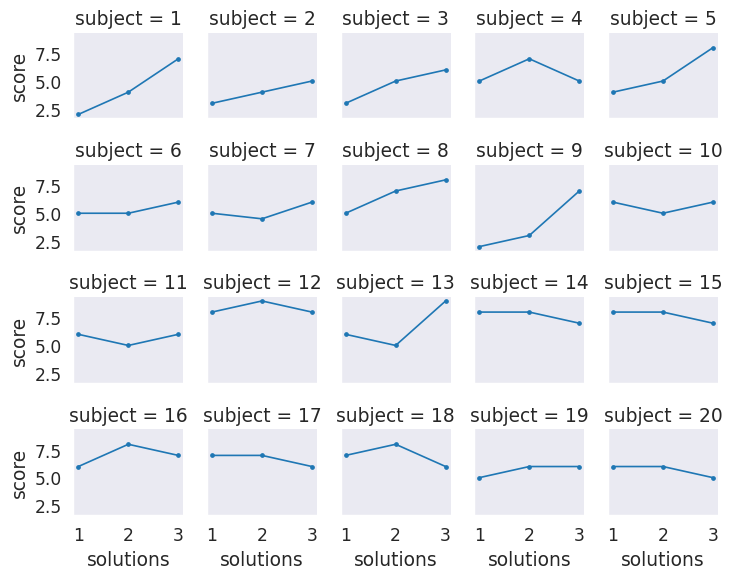

In [96]:
att_df = sns.load_dataset('attention')
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.')

#### Regression Plots

<Figure size 800x600 with 0 Axes>

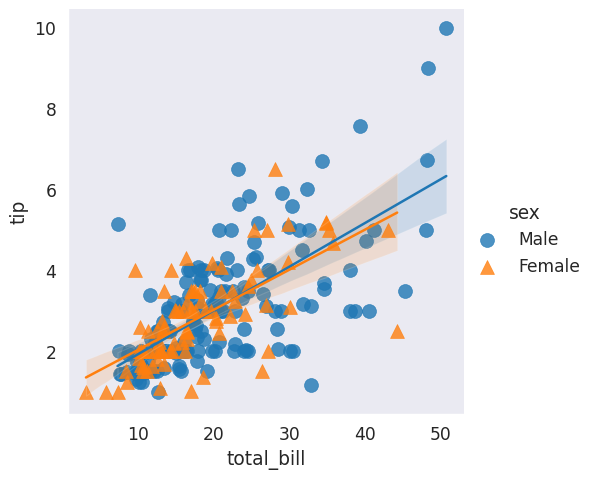

In [99]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o','^'],scatter_kws={'s':100,'linewidth':0.5})


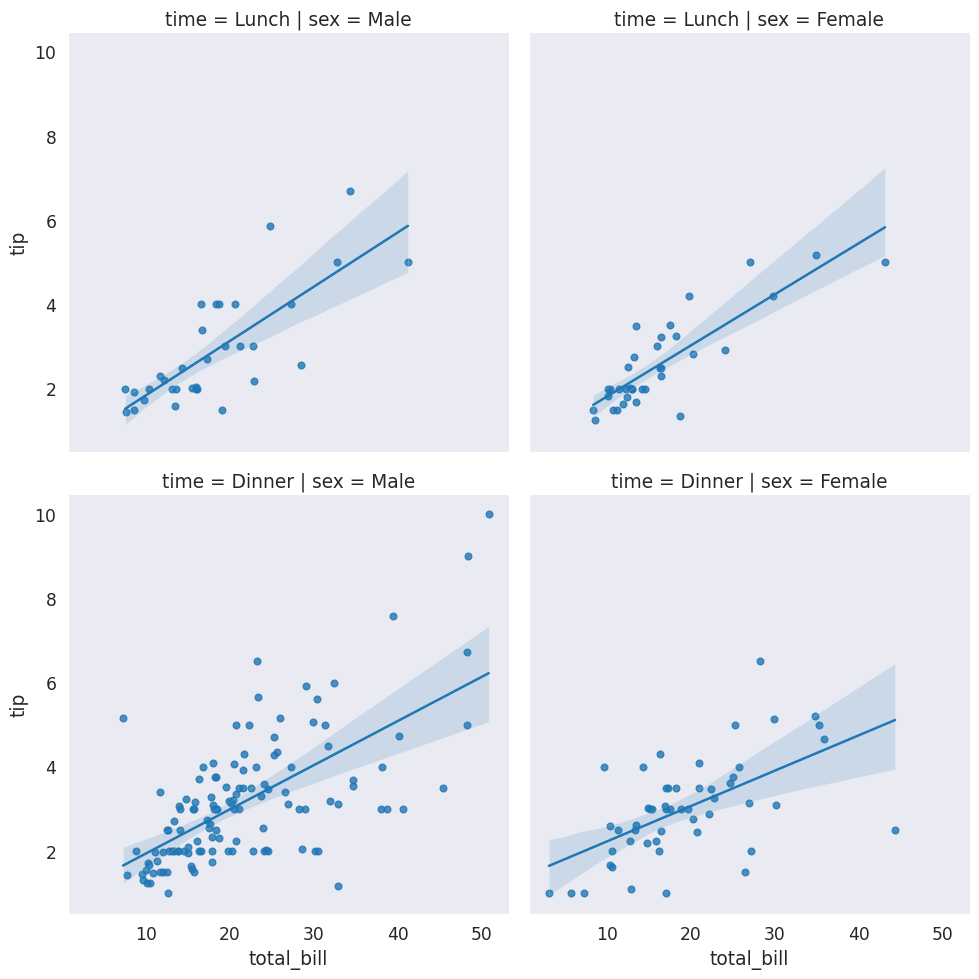

In [98]:
sns.lmplot(x='total_bill',y='tip',col='sex',row='time',data=tips_df)